# Prosper Loan Exploration
## by Damilola Esan
##   
## Introduction
> Prosper loan data contains information on loans facilitated by the peer-to-peer lending platform, Prosper. The dataset includes information on 113,937 loans with 81 variables including the loan amount, borrower's credit score, debt-to-income ratio, employment status, and loan status (e.g. current, charged off, defaulted).
>
> This project would involve creating visual representations of the loan data to help identify patterns and insights. This could include exploring loan characteristics, understanding loan performance, and comparing loan performance across different groups. The goal of the project would be to uncover insights that can inform lending practices and help lenders make more informed decisions.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Preliminary Wrangling

In [2]:
# Loading the dataset into a dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Quick overview of the dataset
print(loan_df.shape)
pd.set_option('display.max_columns', None)
loan_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# More detailed overview of the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

From the [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1675502997462996&usg=AOvVaw39n1YMsQ_1Zh4rvMqt6fn6) provided in the classroom and my understanding of the data set, it was deduced that there are presence of redundant variables that can be excluded from the data set to optimise the exploration process.

In [5]:
# Excluding reduntand columns from the dataset
redundant_cols =  ['ListingKey','CreditGrade','ClosedDate','LenderYield','EstimatedEffectiveYield',
                   'EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore',
                   'BorrowerState','EmploymentStatusDuration','CurrentlyInGroup','GroupKey',
                   'DateCreditPulled','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines',
                   'TotalCreditLinespast7years','OpenRevolvingMonthlyPayment','InquiriesLast6Months',
                   'TotalInquiries','AmountDelinquent','PublicRecordsLast10Years',
                   'PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization',
                   'AvailableBankcardCredit','TotalTrades','TradesNeverDelinquent (percentage)',
                   'TradesOpenedLast6Months','StatedMonthlyIncome','LoanKey','TotalProsperPaymentsBilled',
                   'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','TotalProsperLoans',
                   'ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding',
                   'ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',
                   'LoanMonthsSinceOrigination','LoanNumber','LoanOriginationQuarter','MemberKey',
                   'LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
                   'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
                   'LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations',
                   'InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors']
loan_df = loan_df.drop(redundant_cols, axis = 1)

In [6]:
# Descriptive statistics of the numerical features
pd.set_option('display.max_rows', None)
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.00000,600554.00000,892634.00000,1.255725e+06
Term,113937.0,40.830248,10.436212,12.00000,36.00000,36.00000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.15629,0.20976,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.13400,0.18400,0.25000,4.975000e-01
ListingCategory (numeric),113937.0,2.774209,3.996797,0.00000,1.00000,1.00000,3.00000,2.000000e+01
CreditScoreRangeLower,113346.0,685.567731,66.458275,0.00000,660.00000,680.00000,720.00000,8.800000e+02
CreditScoreRangeUpper,113346.0,704.567731,66.458275,19.00000,679.00000,699.00000,739.00000,8.990000e+02
OpenRevolvingAccounts,113937.0,6.969790,4.630970,0.00000,4.00000,6.00000,9.00000,5.100000e+01
CurrentDelinquencies,113240.0,0.592052,1.978707,0.00000,0.00000,0.00000,0.00000,8.300000e+01
DelinquenciesLast7Years,112947.0,4.154984,10.160216,0.00000,0.00000,0.00000,3.00000,9.900000e+01


In [7]:
# Unique values present in the data
pd.set_option('display.max_rows', None)
loan_df.nunique()

ListingNumber                113066
ListingCreationDate          113064
Term                              3
LoanStatus                       12
BorrowerAPR                    6677
BorrowerRate                   2294
ProsperRating (Alpha)             7
ListingCategory (numeric)        21
Occupation                       67
EmploymentStatus                  8
IsBorrowerHomeowner               2
CreditScoreRangeLower            26
CreditScoreRangeUpper            26
OpenRevolvingAccounts            48
CurrentDelinquencies             47
DelinquenciesLast7Years         100
DebtToIncomeRatio              1207
IncomeRange                       8
IncomeVerifiable                  2
LoanCurrentDaysDelinquent      2411
LoanOriginalAmount             2468
LoanOriginationDate            1873
MonthlyLoanPayment            23567
dtype: int64

In [8]:
# Checking for duplicated entries
loan_df.duplicated().sum()

871

In [9]:
# Checking for null values
loan_df.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
OpenRevolvingAccounts            0
CurrentDelinquencies           697
DelinquenciesLast7Years        990
DebtToIncomeRatio             8554
IncomeRange                      0
IncomeVerifiable                 0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
dtype: int64

In [10]:
# Actual datatypes of each features in the dataset
for col in loan_df.columns:
    print(col, type(loan_df[col][0]))

ListingNumber <class 'numpy.int64'>
ListingCreationDate <class 'str'>
Term <class 'numpy.int64'>
LoanStatus <class 'str'>
BorrowerAPR <class 'numpy.float64'>
BorrowerRate <class 'numpy.float64'>
ProsperRating (Alpha) <class 'float'>
ListingCategory (numeric) <class 'numpy.int64'>
Occupation <class 'str'>
EmploymentStatus <class 'str'>
IsBorrowerHomeowner <class 'numpy.bool_'>
CreditScoreRangeLower <class 'numpy.float64'>
CreditScoreRangeUpper <class 'numpy.float64'>
OpenRevolvingAccounts <class 'numpy.int64'>
CurrentDelinquencies <class 'numpy.float64'>
DelinquenciesLast7Years <class 'numpy.float64'>
DebtToIncomeRatio <class 'numpy.float64'>
IncomeRange <class 'str'>
IncomeVerifiable <class 'numpy.bool_'>
LoanCurrentDaysDelinquent <class 'numpy.int64'>
LoanOriginalAmount <class 'numpy.int64'>
LoanOriginationDate <class 'str'>
MonthlyLoanPayment <class 'numpy.float64'>


## Quality Issues

1. Duplicate entries
2. Incorrect datatyes
3. ListingCategory (Numeric) should contain actual categorical values
4. Categorical columns not ordered properly

In [11]:
# Removing duplicate rows
loan_df = loan_df.drop_duplicates()

In [12]:
# Convert incorrect datatypes to the correct datatypes
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')

In [13]:
# Converting the values from numerical to actual categorical values
category_map = { 0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',
                4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat',
                10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses',
                14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes',
                19: 'Vacation', 20: 'Wedding Loans'}
loan_df['ListingCategory'] = loan_df['ListingCategory (numeric)'].map(category_map)
# Dropping the previous column
loan_df = loan_df.drop('ListingCategory (numeric)', axis = 1)

In [14]:
# Converting to categorical datatye
loan_df['ListingCategory'] = loan_df['ListingCategory'].astype('category')

In [15]:
loan_df.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [16]:
# convert ProsperRating, IncomeRange and LoanStatus into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                    'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999',
                                    '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'LoanStatus': ['Current', 'FinalPaymentInProgress', 'Completed', 'Defaulted', 
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                                   'Chargedoff', 'Cancelled']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

## Tidiness Issues

1. Credit score should be a range ([FICO score](https://www.investopedia.com/terms/f/ficoscore.asp))

Using the pandas 'cut' function to create a new column with the credit score ranges

In [17]:
# Defining bins based on the widely used FICO score
bins = [0, 579, 669, 739, 799, 850]
labels = ['< 579', '580 - 669', '670 - 739', '740 - 799', '800 +']

loan_df['CreditScore'] = pd.cut(loan_df['CreditScoreRangeLower'], bins=bins, labels=labels)

In [18]:
#Dropping the previous credit score columns
loan_df = loan_df.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'], axis = 1)

In [19]:
loan_df.sample(5)

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),Occupation,EmploymentStatus,IsBorrowerHomeowner,OpenRevolvingAccounts,CurrentDelinquencies,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,ListingCategory,CreditScore
89900,511251,2011-06-13 18:31:41.180,36,Current,0.18173,0.1599,B,Teacher,Employed,False,4,0.0,0.0,0.17,"$25,000-49,999",True,0,2000,2011-06-28,70.30,Debt Consolidation,670 - 739
64598,589392,2012-05-16 08:12:17.300,36,Current,0.25259,0.2148,C,Psychologist,Employed,False,10,0.0,0.0,0.62,"$25,000-49,999",True,0,14000,2012-05-25,530.91,Debt Consolidation,740 - 799
66035,603610,2012-06-24 23:44:12.527,12,Completed,0.09986,0.0628,A,Professional,Employed,False,15,0.0,0.0,0.04,"$100,000+",True,0,2000,2012-06-26,172.39,Home Improvement,670 - 739
109507,633828,2012-09-05 13:09:02.183,36,Current,0.23121,0.1939,C,Other,Employed,True,7,0.0,0.0,0.25,"$25,000-49,999",True,0,12000,2012-09-19,442.24,Debt Consolidation,580 - 669
41099,1180422,2014-02-02 09:48:16.880,36,Current,0.24563,0.2080,D,Medical Technician,Employed,False,6,0.0,0.0,0.27,"$25,000-49,999",True,0,5000,2014-02-14,187.86,Debt Consolidation,580 - 669


In [20]:
loan_df.duplicated().sum(), loan_df.shape

(0, (113066, 22))

### What is the structure of your dataset?

> This dataset is a structured dataset that contains information on loans facilitated by the peer-to-peer lending platform, Prosper. It has 113,066 (rows) and 22 variables (columns).

### What is/are the main feature(s) of interest in your dataset?

> The features of interest in the dataset are the loan amount, borrower's credit score, debt-to-income ratio and mainly loan status (e.g. current, charged off, defaulted).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Other features in the dataset that could help support the investigation into the main feature of interest include the borrower's APR and rate, income range, loan term and credit score. These variables could help identify trends and patterns in loan performance and inform risk assessment practices for lenders. Additionally, variables related to borrower behavior, such as past delinquencies or credit inquiries, could also be relevant for investigating loan performance.

## Univariate Exploration

> I'll start by exploring the main feature of interest 'LoanStatus' and understand its distribution


What is the distribution of the loan status?

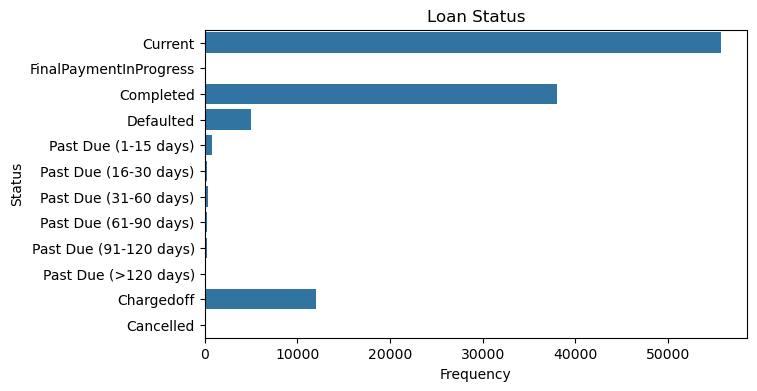

In [21]:
# Plotting the ordinal distribution of the loan status
base_color = sb.color_palette()[0]

plt.figure(figsize=[7,4])
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color)
plt.title('Loan Status')
plt.ylabel('Status')
plt.xlabel('Frequency');

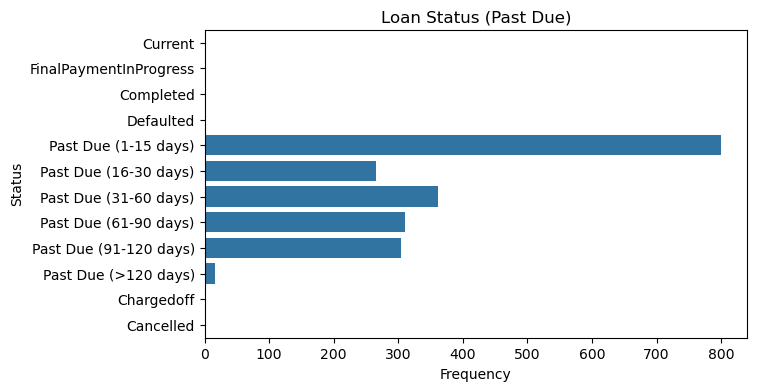

In [22]:
# It was hard to determine the distribution of the PastDues, lets plot for only the Past Due loans
past_due = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
            'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
loan_past_due = loan_df[loan_df['LoanStatus'].isin(past_due)]

plt.figure(figsize=[7,4])
sb.countplot(data = loan_past_due, y = 'LoanStatus', color = base_color)
plt.title('Loan Status (Past Due)')
plt.ylabel('Status')
plt.xlabel('Frequency');

As we can see from the count plot, the most common loan status is Current, with about 50,000 loans falling into this category. Completed is the second most common loan status, with almost 40,000 loans fully repaid. Chargedoff is the third most common loan status, with over 10,000 loans that have been written off by the lender as a loss. The distribution of other loan statuses such as FinalPaymentInProgress, Defaulted, and Past Due varies, with smaller numbers of loans falling into these categories.

We can also see that the loan statuses can be broadly grouped into three categories: Active loans (Current and Final payment in progress), Repaid loans (Completed and Cancelled), and Defaulted loans (Defaulted, Past Due, and Chargedoff). This categorization helps us to understand the status of the loans in the dataset and to monitor the performance.

In [23]:
# Defining a function to categorize the loan status
def categorize_loan_status(LoanStatus):
    if LoanStatus in ['Current', 'FinalPaymentInProgress']:
        return 'Active'
    elif LoanStatus in ['Completed', 'Cancelled']:
        return 'Repaid'
    else:
        return 'Defaulted'

loan_df['LoanStatus'] = loan_df['LoanStatus'].apply(categorize_loan_status)
print(loan_df['LoanStatus'].value_counts())

Active       55933
Repaid       38066
Defaulted    19067
Name: LoanStatus, dtype: int64


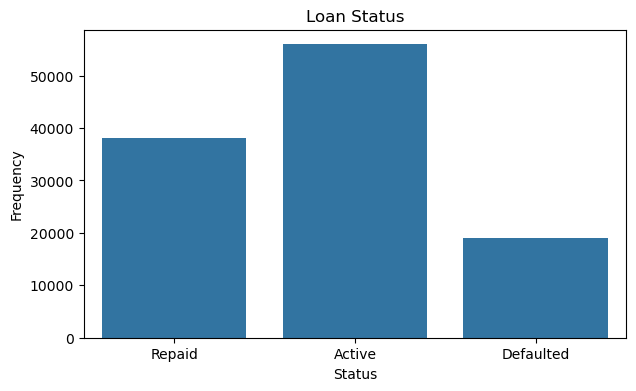

In [24]:
# Re-plotting the Loan Status
base_color = sb.color_palette()[0]

plt.figure(figsize=[7,4])
sb.countplot(data = loan_df, x = 'LoanStatus', color = base_color)
plt.title('Loan Status')
plt.xlabel('Status')
plt.ylabel('Frequency');

The LoanStatus has been categorized into three categories - Active, Repaid, and Defaulted. The Active category includes loans that are currently being paid. The Repaid category includes loans that have been fully paid. The Defaulted category includes loans that are past overdue or failed to be paid back, resulting in a loss for the lender. The majority of loans are in the Active category, followed by Repaid loans, and then Defaulted loans.

Lets move ahead and explore the other variables in the dataset

What is the distribution of the credit score?

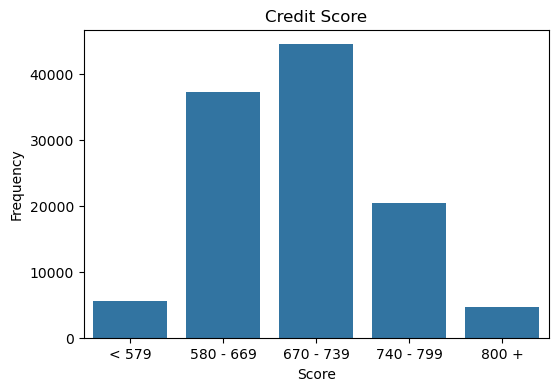

In [25]:
# Plotting the credit score on a standard scale
base_color = sb.color_palette()[0]

plt.figure(figsize=[6,4])
sb.countplot(data = loan_df, x = 'CreditScore', color = base_color)
plt.title('Credit Score')
plt.xlabel('Score')
plt.ylabel('Frequency');

From this countplot, we can observe that the largest number of individuals in the dataset fall in the third range of credit scores, between 670 and 739, while the smallest number of individuals have credit scores of 800 or higher. The overall shape of the distribution appears to be right-skewed, meaning that there are more individuals with lower credit scores and fewer individuals with higher credit scores.

What are the distribution of closely related numeric variabls?

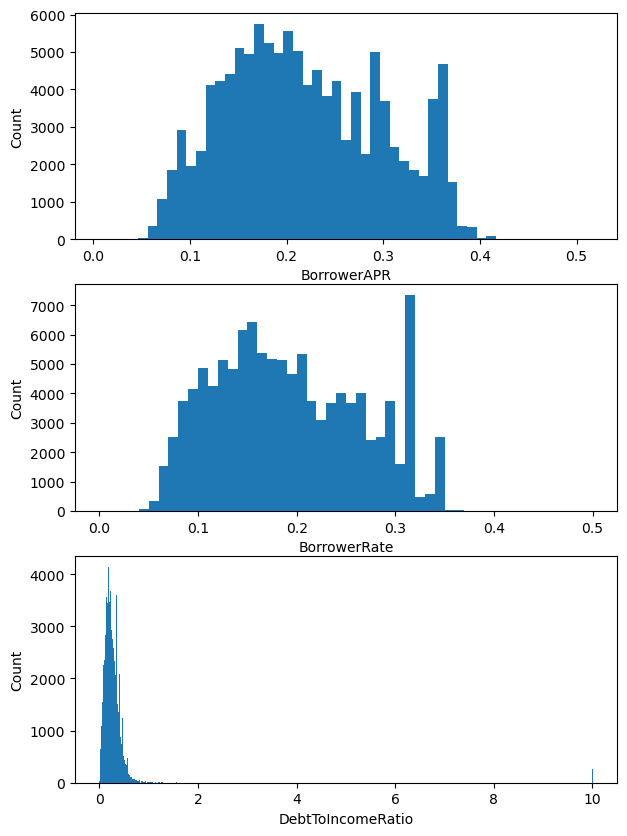

In [26]:
# Exploring closely related variables using a standard histogram plot
fig, ax = plt.subplots(nrows=3, figsize = [7,10])

binsize = 0.01
variables = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loan_df[var]), max(loan_df[var]) + binsize, binsize)
    ax[i].hist(data = loan_df, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('Count')

plt.show();

This shows that the borrower APR is roughly normally distributed, the distribution ranges from approximately 0 to 0.5, indicating that there is variability in the APR rates offered by Prosper to its borrowers. The borrower rate is also roughly normally distributed, the distribution ranges from approximately 0 to 0.4, indicating that there is also variability in the interest rates offered by Prosper to its borrowers. Both the borrower APR and borrower rate variables are important indicators of the cost of borrowing for Prosper's borrowers. Their distributions suggests that the rates offered by Prosper are relatively stable, with a range of rates that vary from low to moderate values. 

However, the debt-to-income (DTI) ratio tells a different story, it reveals that the distribution is right-skewed. The distribution is relatively spread out, with a range of DTI ratios from 0 to 10, indicating a wide range of borrower debt levels relative to income. Additionally, a large proportion of borrowers in the dataset have a DTI ratio of less than 0.9, which is a common threshold used by lenders to determine creditworthiness. However, there are also a significant number of borrowers with DTI ratios above 0.9 which could be considered outliers or very high-risk borrowers.

In [27]:
# Checking for outliers
outliers = loan_df['DebtToIncomeRatio'] > 0.9

print(outliers.sum())
print(loan_df.loc[outliers,['DebtToIncomeRatio','IncomeRange', 'LoanOriginalAmount']])

953
        DebtToIncomeRatio     IncomeRange  LoanOriginalAmount
22                9.20000       $1-24,999                4000
226              10.01000   Not displayed                1000
368               1.65000       $1-24,999               16000
419               1.26000       $1-24,999                4000
480               0.95000       $1-24,999                6000
576              10.01000       $1-24,999                1500
626              10.01000       $1-24,999                2000
627               1.89000       $1-24,999                2500
1242             10.01000    Not employed                3000
1326              1.19000  $25,000-49,999                4000
1356              3.49000       $1-24,999                1450
1617              0.91000       $1-24,999                5500
1620              2.50000   Not displayed                3000
1925             10.01000    Not employed                3000
2155             10.01000       $100,000+               13500
2217

Naturally, a DTI ratio that can qualify for a loan should not be more than 0.5 and should never be greater than or equal to 1 because that means the lender is using the entirety of its income to service a loan and are considered high risk debtors. There are 953 entries with DTI greater than 0.9, lets exclude this from the dataset.

In [28]:
# Removing the outliers
loan_df = loan_df.query('DebtToIncomeRatio <= 0.9')

print(loan_df.loc[outliers,:])

Empty DataFrame
Columns: [ListingNumber, ListingCreationDate, Term, LoanStatus, BorrowerAPR, BorrowerRate, ProsperRating (Alpha), Occupation, EmploymentStatus, IsBorrowerHomeowner, OpenRevolvingAccounts, CurrentDelinquencies, DelinquenciesLast7Years, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, LoanCurrentDaysDelinquent, LoanOriginalAmount, LoanOriginationDate, MonthlyLoanPayment, ListingCategory, CreditScore]
Index: []


What will be the distribution of the DTI ratio after removing ratios greater than 0.9?

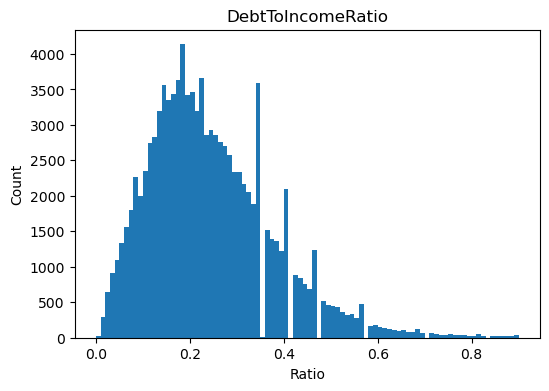

In [29]:
# Re-plotting the distribution of the DTI ratio
bins = np.arange(0, loan_df.DebtToIncomeRatio.max() + binsize, binsize)

plt.figure(figsize=[6,4])
plt.hist(data = loan_df, x = 'DebtToIncomeRatio', bins = bins)
plt.title('DebtToIncomeRatio')
plt.xlabel('Ratio')
plt.ylabel('Count');

Observing the histogram of the DTI ratio distribution after removing all ratios above 0.9, we can see that the majority of borrowers have a DTI ratio below 0.5. The histogram is skewed to the right, indicating that there are relatively fewer borrowers with a high DTI ratio. There is a peak at around 0.2, indicating that a significant number of borrowers have a DTI ratio in this range. There are also smaller peaks around 0.3 and 0.4, suggesting that there are still a considerable number of borrowers with a higher DTI ratio.

The distribution is relatively smooth, indicating that there are no significant gaps or anomalies in the data anymore. Overall, it appears that most borrowers have a relatively low DTI ratio, which could be a positive factor in terms of their ability to repay their loans.

What could be the modal distribution of the loan amount?

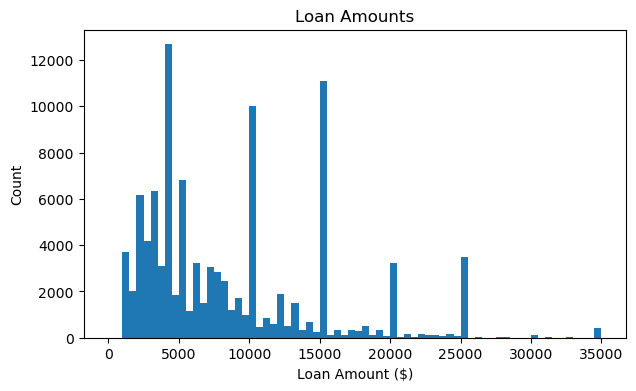

In [30]:
# Histogram plot of the loan amount
plt.figure(figsize=[7,4])
bins = np.arange(0, loan_df.LoanOriginalAmount.max() + 500, 500)

plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amounts');

The distribution appears to be slightly skewed to the right, with peaks around 5,000, 10,000, 15,000 and 25,000 dollars which shows that the data is multimodal, there are various buckets of borrowers at every 5000 interval. The majority of loans fall within a reasonable range, but there are some extreme outliers on the high end.

The distribution of the loan amount suggests that the platform is primarily used for small to medium-sized loans, with borrowers typically seeking relatively modest amounts of loan.

How will the loan amount be distributed on a log scale?

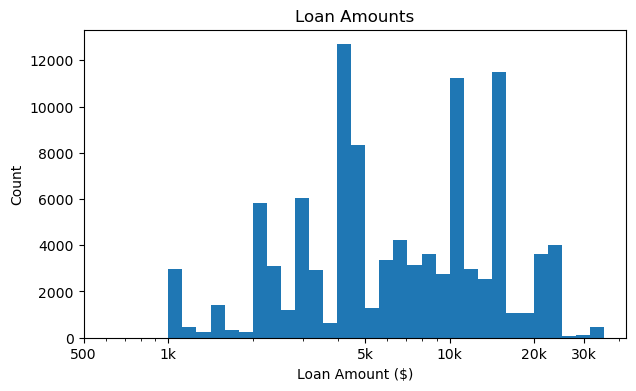

In [31]:
# Based on the modality of the data, let's plot it on a log scale
plt.figure(figsize=[7,4])
log_bin = 0.05
bins = 10 ** np.arange(3, np.log10(loan_df.LoanOriginalAmount.max()) + log_bin, log_bin)

plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 5e3, 1e4, 2e4, 3e4], ['500', '1k', '5k', '10k', '20k', '30k'])
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.title('Loan Amounts');

The log scale reveals a more evenly spread out distribution with no single peak dominating the plot. There are significant numbers of borrowers seeking both small and large loans, with a small bump in the range of loans between 2,000 and 15,000

Lets have a quick look at the Loan Term

What is the normalized ratio of loan terms in the dataset?

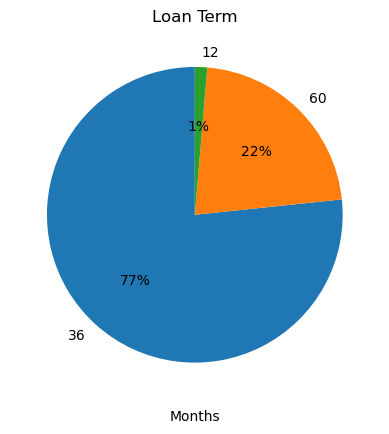

In [32]:
# Plotting the loan term on a pie chart
counts = loan_df.Term.value_counts()
plt.pie(counts.values, labels = counts.index, startangle = 90, counterclock = True,
        autopct = '%1.0f%%')
plt.title('Loan Term')
plt.xlabel('Months')
plt.show();

It is clear from the pie chart that the majority of borrowers prefer a 36-month term, with the 60-month term being a distant second. This may be due to the fact that a 36-month term allows for lower overall interest payments and faster debt repayment, while a 60-month term may offer lower monthly payments but higher interest costs over the life of the loan

Lastly, I would like to observe the distribution of the other ordinal variables (Prosper Rating and Income range)

What is the distribution of ordinal variables like prosper rating and income range?

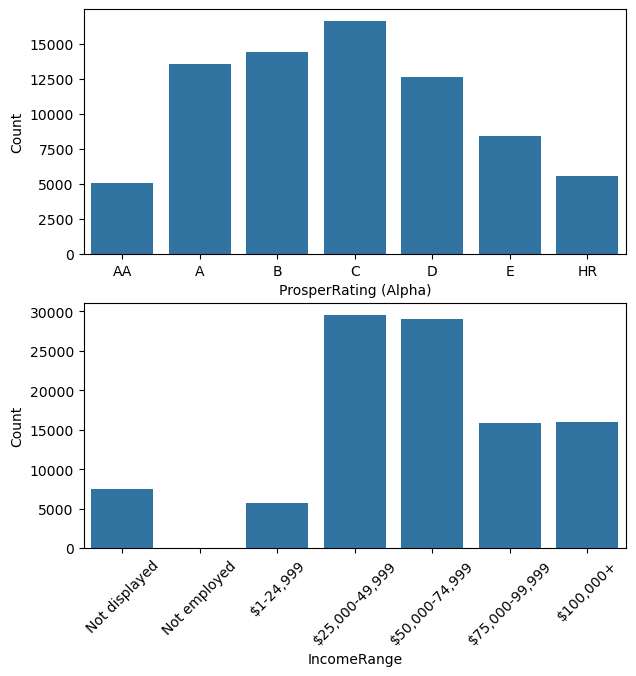

In [33]:
# Ploting the ordinal variables
fig, ax = plt.subplots(nrows=2, figsize = [7,7])

variables = ['ProsperRating (Alpha)', 'IncomeRange']
for i in range(len(variables)):
    var = variables[i]
    sb.countplot(data = loan_df, x = var, color = base_color, ax=ax[i])
    plt.xticks(rotation = 45)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('Count')

plt.show();

Looking at the distribution of Prosper Rating (Alpha), we can see that the majority of borrowers fall within the A, B, and C rating categories, with the highest number of borrowers having a C rating. The ratings are skewed towards the right, with fewer borrowers having lower ratings (AA) and higher ratings (HR). Regarding the Income Range, we can see that the majority of borrowers earn between 25,000 and 74,999, with the highest number of borrowers earning between 50,000 and 74,999. The income range distribution is also skewed to the right, with fewer borrowers having lower income ranges (less than 25,000) and higher income ranges (more than 100,000).

Moreover, there is a small number of borrowers who have not disclosed their income or are not employed, and these groups are likely to have a significant impact on the overall risk profile of the lender.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan status was initially explored using a count plot, which revealed that most loans were in the current status, followed by completed loans. However, it was necessary to restructure the loan status into three categories: Active loans, Repaid loans, and Defaulted loans. The count plot of this new structure showed that most loans were active, followed by repaid loans, and then defaulted loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Histogram plots were used to explore the distribution of Borrower APR, borrower rate, and debt to income ratio. The distribution of DTI ratio was slightly skewed to the right and the DTI ratios greater than 0.9 were removed as outliers. The distributions of Borrower APR and borrower rate were roughly normal, with very few outliers at the high end. 
>
> Most of the distributions were roughly normal with some outliers, and no major transformations were needed except for restructuring the loan status and removing DTI ratios greater than 0.9 as outliers

## Bivariate Exploration

> I'll be using bivariate plots to explore the relationships between two variables and how they impact one another

In [34]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103641 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingNumber              103641 non-null  int64         
 1   ListingCreationDate        103641 non-null  datetime64[ns]
 2   Term                       103641 non-null  int64         
 3   LoanStatus                 103641 non-null  object        
 4   BorrowerAPR                103616 non-null  float64       
 5   BorrowerRate               103641 non-null  float64       
 6   ProsperRating (Alpha)      76351 non-null   category      
 7   Occupation                 100155 non-null  object        
 8   EmploymentStatus           101428 non-null  category      
 9   IsBorrowerHomeowner        103641 non-null  bool          
 10  OpenRevolvingAccounts      103641 non-null  int64         
 11  CurrentDelinquencies       103058 non-null  float64 

In [35]:
# Defining numeric and categorical columns 
numeric_cols = ['Term', 'BorrowerAPR', 'BorrowerRate', 'OpenRevolvingAccounts', 
                'CurrentDelinquencies', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 
                'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categorical_cols = ['LoanStatus', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 
                    'IncomeRange', 'ListingCategory', 'CreditScore', 'IsBorrowerHomeowner', 
                    'IncomeVerifiable']

Let's understand the pairwise correlation present amongst variables in the dataset

What are the correlation between numeric variables in the dataset?

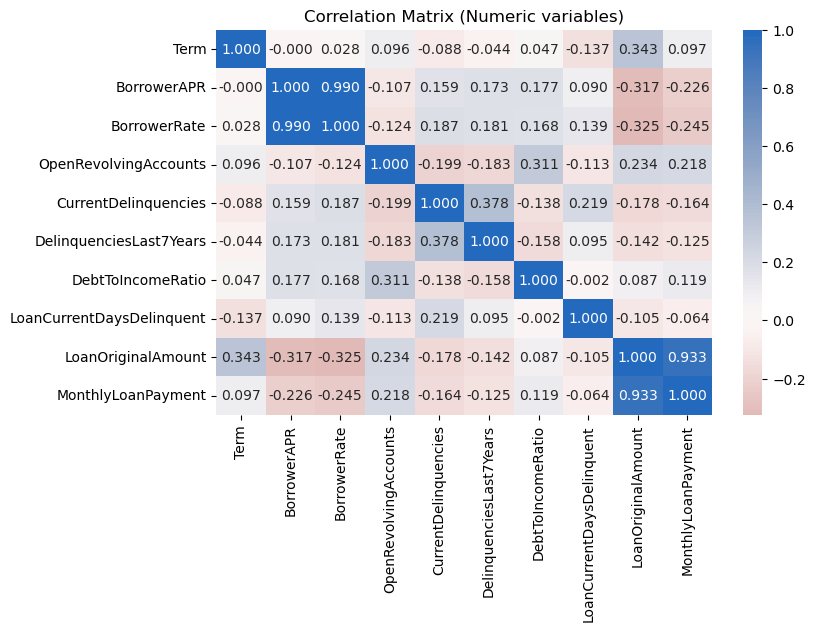

In [36]:
# Plotting a correlation Matrix
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df[numeric_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix (Numeric variables)')
plt.show();

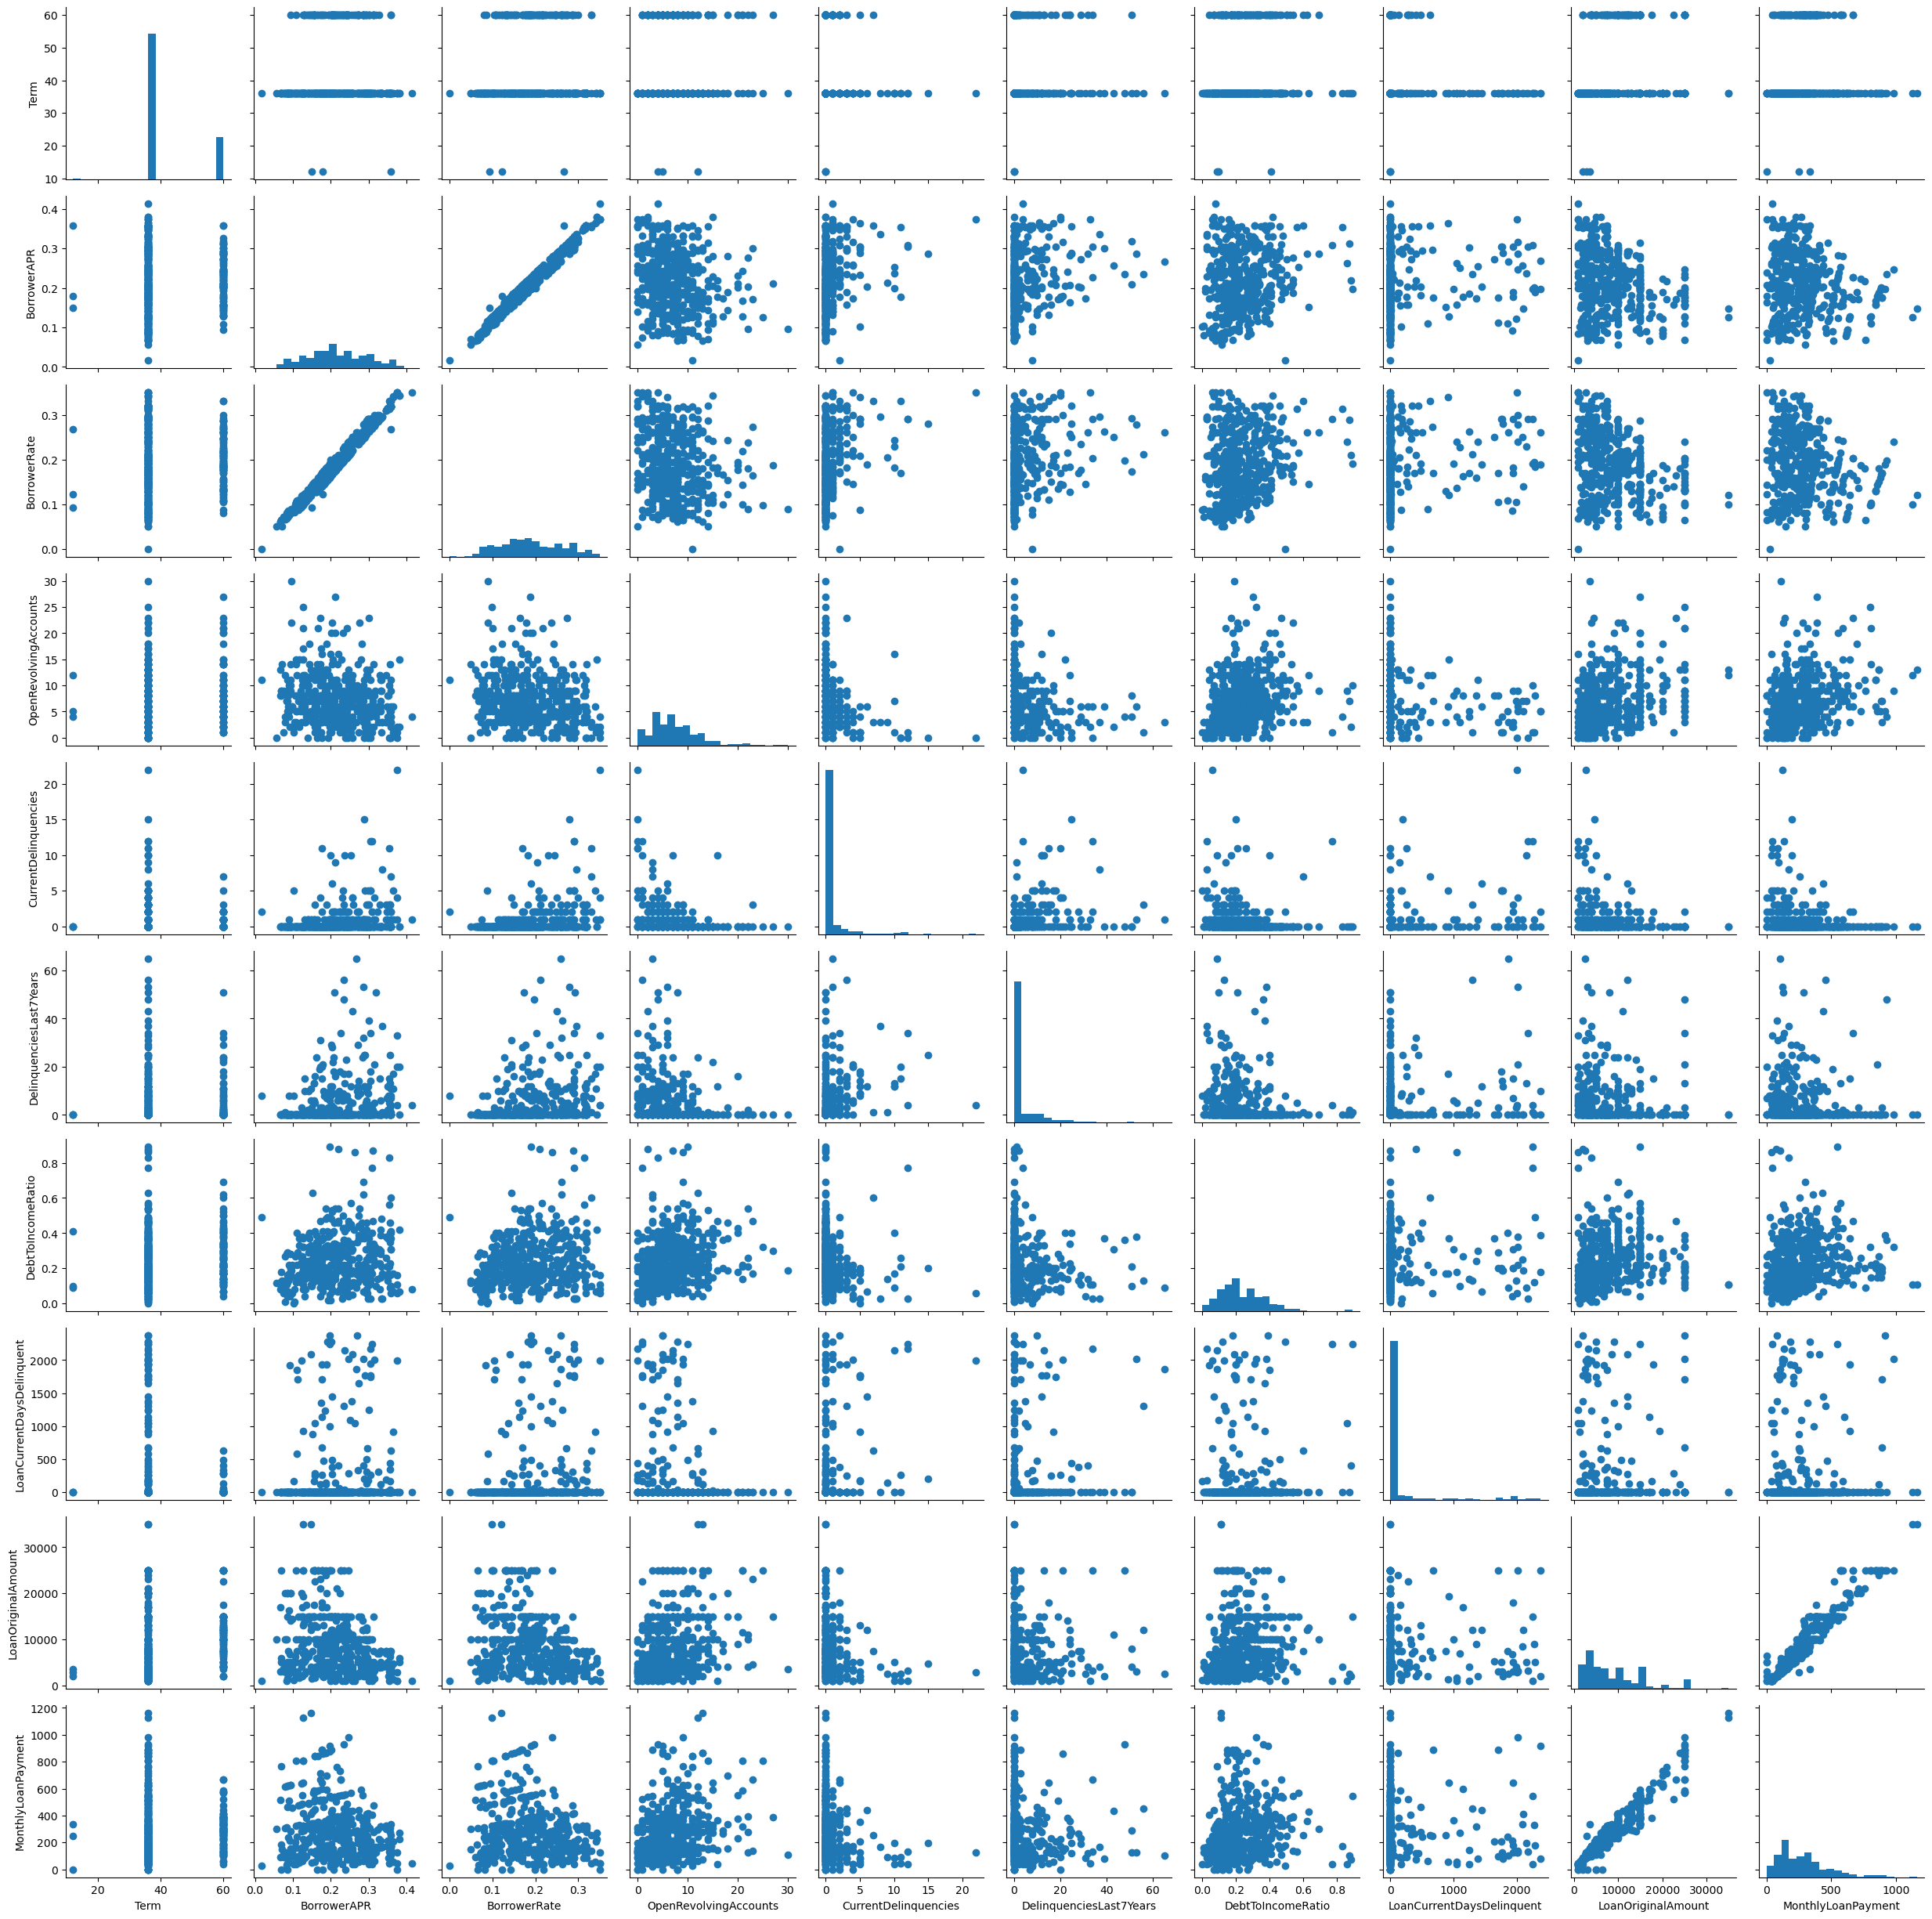

In [37]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster
def get_sample(df, n):
    samples = np.random.choice(df.shape[0], n, replace=False)
    valid_samples = np.intersect1d(samples, df.index)
    return df.loc[valid_samples,:]

loan_samp = get_sample(loan_df, 500)

g = sb.PairGrid(data = loan_samp, vars = numeric_cols)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Based on the high number of numeric columns, it was hard to discern the result from the pair grid. However, from the correlation matrix above. It was observed that the relationship between borrower APR and borrower rate shows a strong positive correlation, indicating that the higher the APR, the higher the borrower rate. This relationship is expected since the borrower rate is often calculated based on the borrower's creditworthiness, and a high APR may indicate a higher risk borrower. Also, the relationship between loan amount and monthly loan payment shows a positive correlation, indicating that higher loan amounts are associated with higher monthly payments which can also be expected.

In all,the correlation coefficient shows that there are relatively less correlation between the numeric features. I won't be pairing numeric variables but would rather focus on categorical and numeric variables relationship and two categorical variable relationships

What are the influence of borrower's APR and rate on loan status?

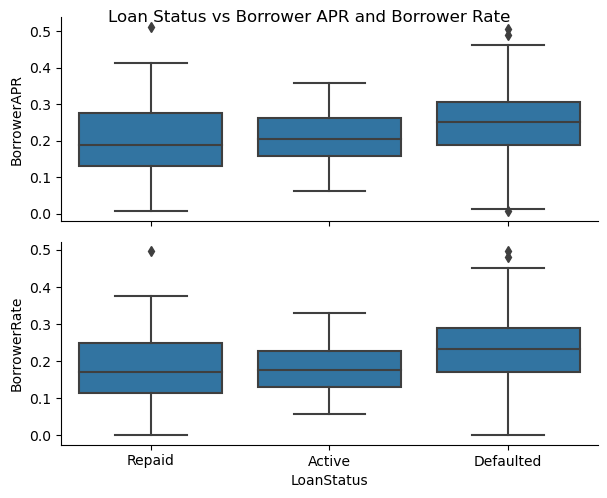

In [38]:
# Lets see how the Loan Status correlate with other variables
g = sb.PairGrid(data = loan_df, y_vars = ['BorrowerAPR', 'BorrowerRate'], x_vars = ['LoanStatus'], 
                aspect = 2.5)
g.map(sb.boxplot, color = base_color)
g.fig.suptitle('Loan Status vs Borrower APR and Borrower Rate')
plt.show();

This is quite insightful as it suggest that there is a significant relationship between borrower APR and rate and loan status. The boxplots show that the median APR is highest for defaulted loans, followed by active loans, and then repaid loans. The IQR is also larger for defaulted loans, indicating more variability in APR for these loans. Borrowers with higher APRs and rates may be more likely to default which can impact loan performance and investor returns. Additionally, the transformation of the LoanStatus feature into three categories provides a more nuanced understanding of loan performance and can help us better assess loan risk and make more informed lending decisions.

What is the relationship between loan status and income range?

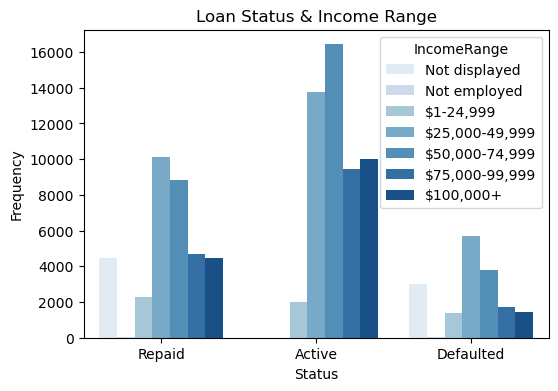

In [39]:
# Plotting a clustered bar chart of the loan status and income range
plt.figure(figsize=[6,4])

sb.countplot(data = loan_df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.title('Loan Status & Income Range')
plt.xlabel('Status')
plt.ylabel('Frequency');

There is a slight decrease in the proportion of active loans as the income range increases, with a corresponding decrease in the proportion of repaid loans. Conversely, there is an increase in the proportion of defaulted loans as the income range decreases, with a corresponding increase in the proportion of repaid loans

What does credit score tell us about the DTI ratio?

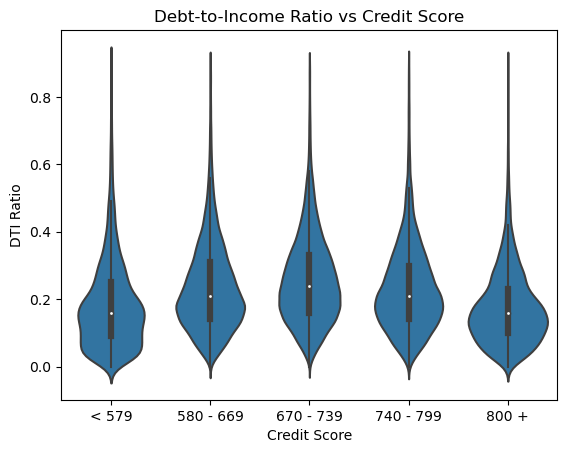

In [40]:
# Let's observe the relationship between credit scores and DTI ratios through a violin plot
sb.violinplot(data = loan_df, x = 'CreditScore', y = 'DebtToIncomeRatio', color = base_color)
plt.title('Debt-to-Income Ratio vs Credit Score')
plt.ylabel('DTI Ratio')
plt.xlabel('Credit Score')
plt.show();

The plot reveals that there are a few borrowers with DTI ratios greater than 0.4, and they are mostly concentrated in the lower credit score ranges. The removal of DTI ratios above 0.9 from the dataset may have contributed to the truncation of the plot at DTI values around 0.9. Overall, the plot suggests that a borrower's credit score is a significant determinant of their DTI ratio, and borrowers with lower credit scores are more likely to have higher DTI ratios.

What could be the relationship betwen employment status and income range?

C:\Users\Esan_Darme\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


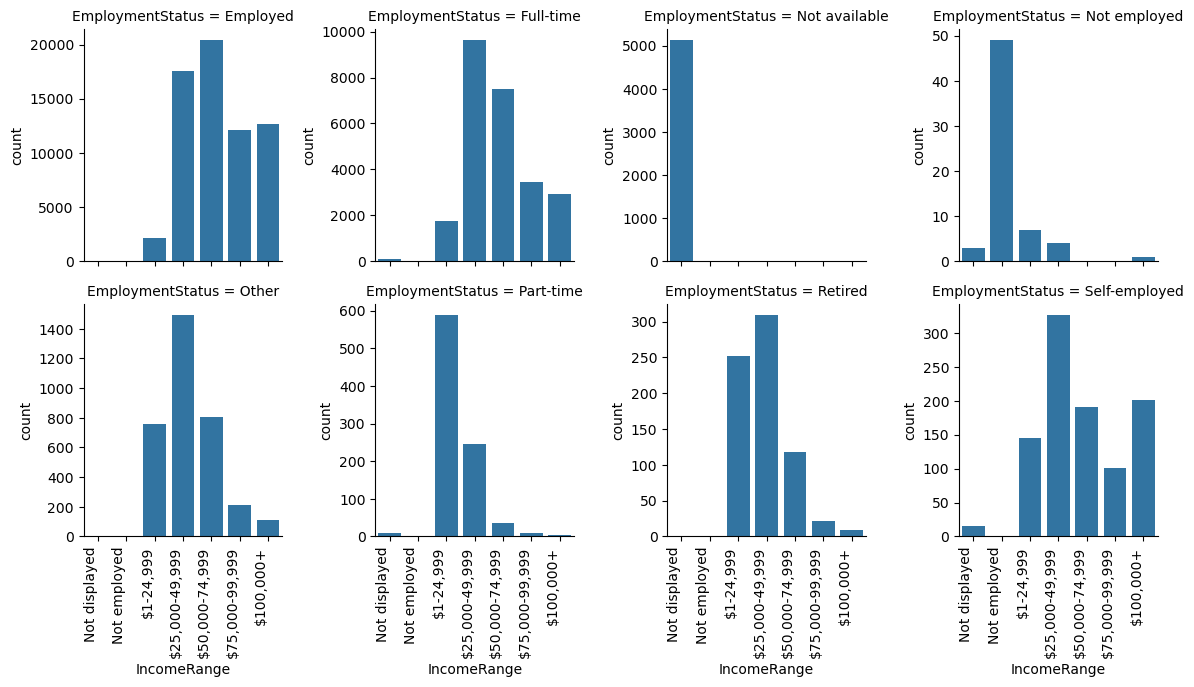

In [41]:
# Faceted grid count plot of employment status and income range
g = sb.FacetGrid(data = loan_df, col = 'EmploymentStatus', col_wrap = 4, sharey = False)
g.map(sb.countplot, 'IncomeRange')
g.set_xticklabels(rotation = 90, ha = 'right');

The plot shows the distribution of the income range variable for each employment status category. The majority of borrowers fall within the income range of 25,000 to 74,999, regardless of their employment status. The count of borrowers with income range above 75,000 generally decreases with more restrictive employment statuses, such as "Not employed" or "Part-Time." On the other hand, the count of borrowers with income range below 25,000 tends to increase with more restrictive employment statuses. Additionally, the "Other" employment status category has a higher proportion of borrowers with income range between 25,000 and 50,000 compared to the other employment status categories.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was observed that the borrower APR and borrower rate tend to be higher for defaulted loans compared to active and repaid loans. This suggests that borrowers with higher APR and rates may be at a higher risk of defaulting on their loans. Also, when looking at the relationship between loan status and income range, it was observed that borrowers with average earnings were more likely to have repaid or are making active loan repayments, while those with lower incomes were more likely to have defaulted loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The faceted countplot shows that the majority of borrowers are employed, with a relatively even distribution across income ranges. However, there is a higher proportion of unemployed or retired borrowers in the lower income ranges. There is also a higher proportion of borrowers with incomes over 100,000 who are employed, self employed and on full-time.
>
> Additionally, the data suggests that there is a slight negative correlation between credit score and DTI ratio, with borrowers with lower credit scores tending to have slightly higher DTI ratios.

## Multivariate Exploration

> The focus here is to explore how closely related features influence the loan status

What are the multivariate relationship associated with loan status?

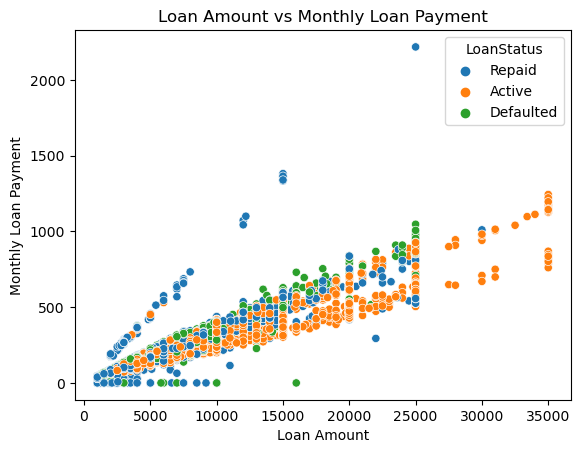

In [42]:
# A scatter plot with loan status as hue
loan_samp = get_sample(loan_df, 10000)

sb.scatterplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', data = loan_samp, hue = 'LoanStatus')
plt.title('Loan Amount vs Monthly Loan Payment')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Loan Payment')
plt.show();

We can see that most of the loans in the dataset fall under the Active loans, indicating that a significant proportion of borrowers are currently repaying their loans. This suggests that Prosper has been successful in facilitating loans that borrowers are able to repay. There is also a significant number of Active loans where borrowers make higher monthly payments with relatively lesser loan amount.

The plot also shows that loans in the Repaid loans category tend to have a higher loan amount and monthly payment compared to those in the Defaulted loans category. This observation suggests that borrowers who take out larger loans and make higher monthly payments are more likely to repay their loans in full. Defaulted loans tend to have an average loan amount and monthly payment. This suggests that borrowers who take out smaller loans and make lower monthly payments may have weaker financial stability and are more likely to default on their loans.

Could there be any effect of verifiable income on prosper ratings and borrower's APR?

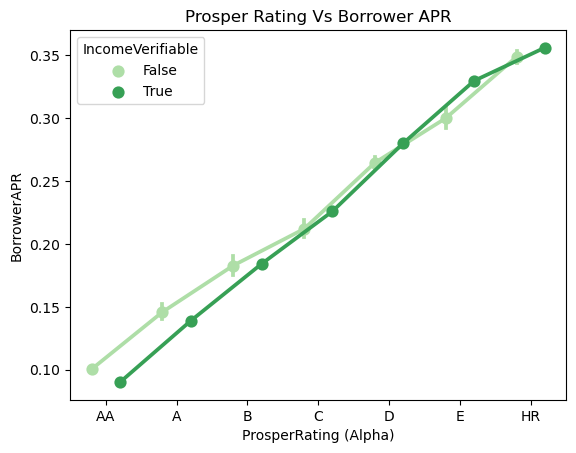

In [43]:
# A quick check on features likely to influence Borrower APR
sb.pointplot(data = loan_df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IncomeVerifiable',
             palette = 'Greens', linestyles = '-', dodge = 0.4)
plt.title('Prosper Rating Vs Borrower APR');

The plot shows that there is a clear relationship between ProsperRating (Alpha) and BorrowerAPR. As the ProsperRating (Alpha) increases from AA to HR, the BorrowerAPR increases. The borrowers with verifiable incomes generally have lower APRs compared to those without verifiable incomes. Additionally, it shows that ProsperRating (Alpha) and IncomeVerifiable are both important factors in determining the BorrowerAPR.

How does having a home factor into DTI ratios and credit scores?

C:\Users\Esan_Darme\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


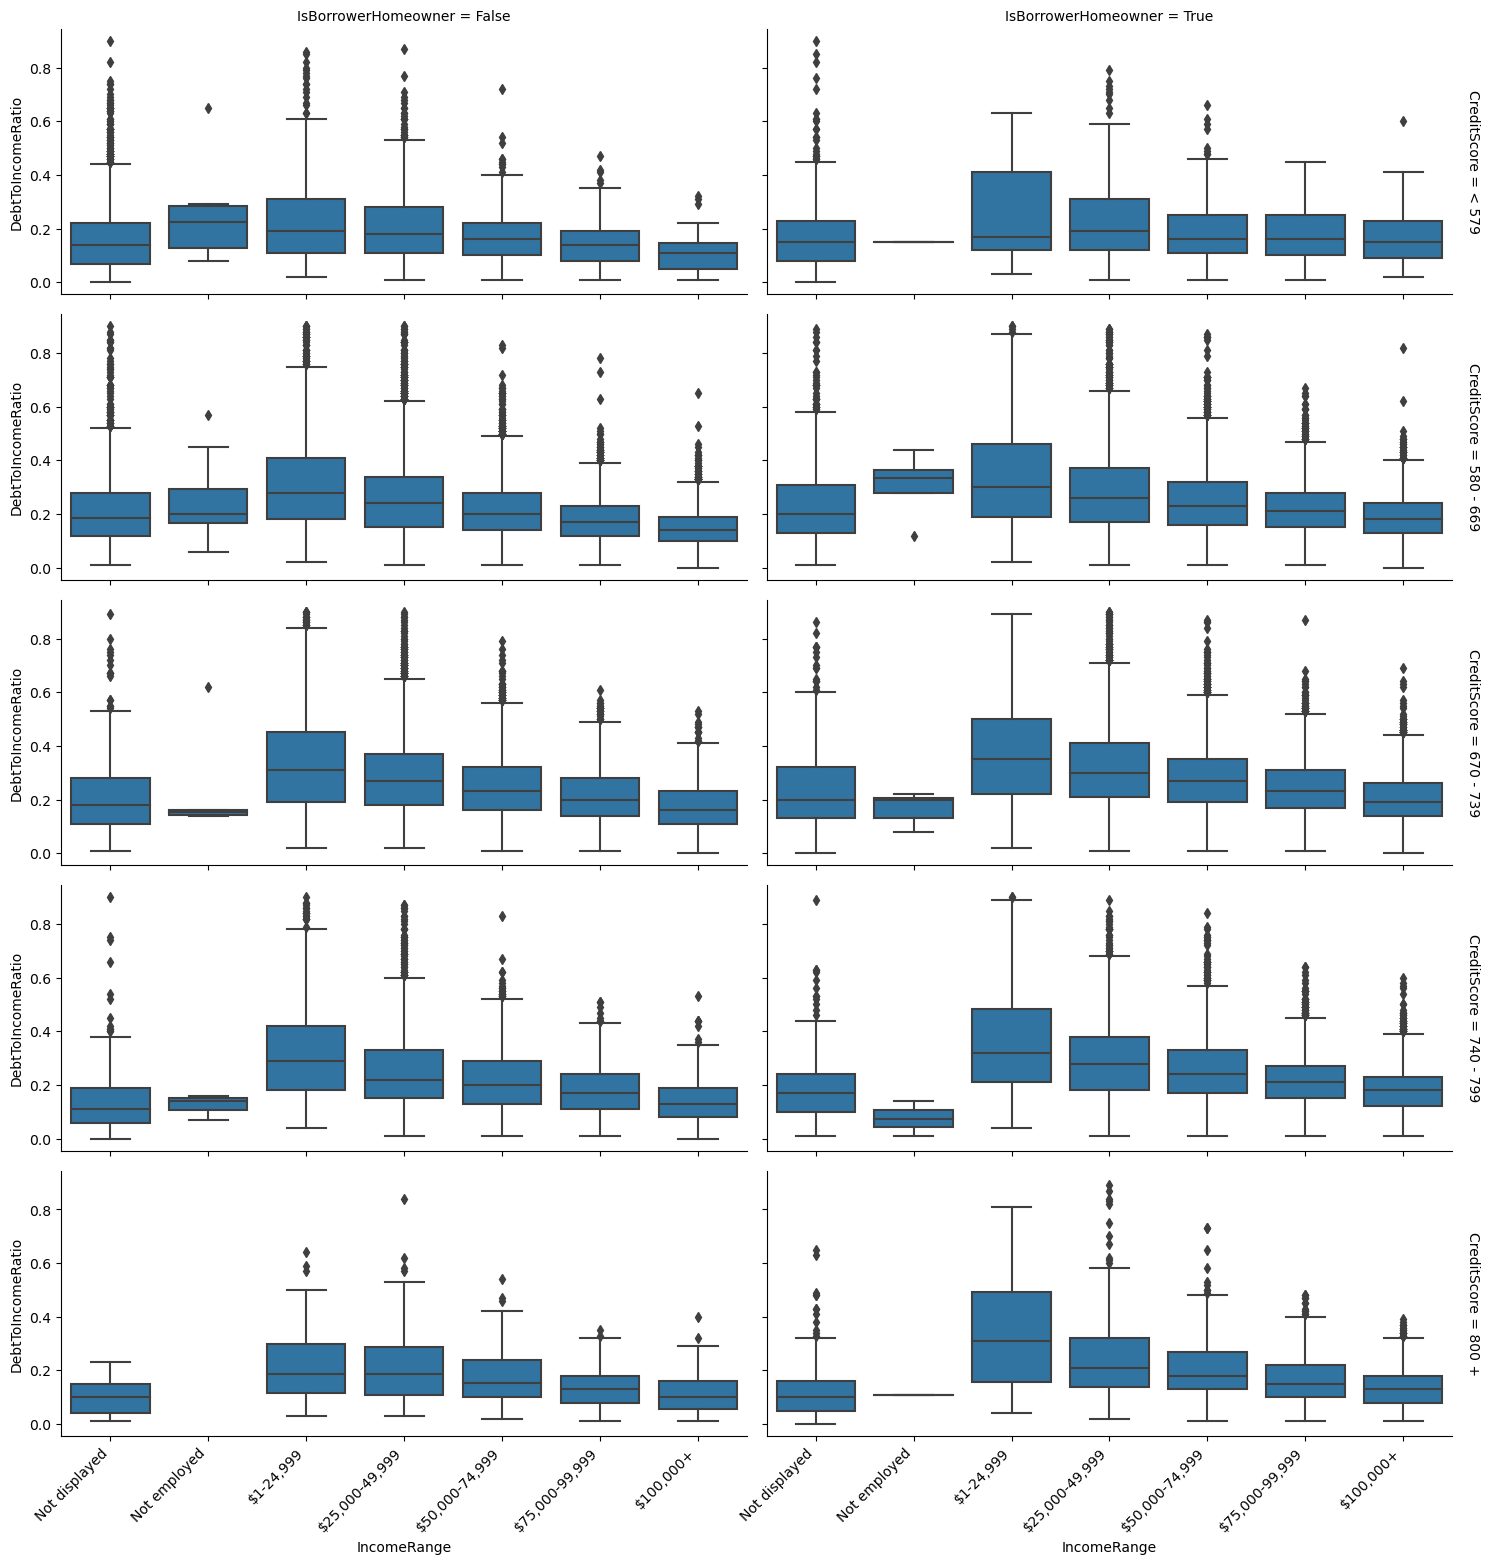

In [44]:
# Lets take an indepth look on the Homeowner feature
g = sb.FacetGrid(data = loan_df, col = 'IsBorrowerHomeowner', row = 'CreditScore', aspect = 2.5,
                margin_titles = True)
g.map(sb.boxplot, 'IncomeRange', 'DebtToIncomeRatio')
g.set_xticklabels(rotation = 45, ha = 'right');

The plots show that for both homeowner and non-homeowner, higher income ranges are associated with lower median DTI ratios. Also, for both homeowner and non-homeowner borrowers, higher credit scores are associated with lower median DTI ratios. However, there are some interesting differences between the homeowner and non-homeowner groups. For non-homeowners, there is a clear pattern of decreasing DTI ratios as income ranges increase within each credit score category. For homeowners, this pattern is less clear, with some income range categories having higher median DTI ratios than adjacent categories.

In conclusion, this plot highlights some of the key relationships between borrower characteristics and DTI ratios, and suggests that homeowner status, credit score, and income range are all important factors to consider when assessing the risk associated with a given loan application.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The scatter plot of loan amount vs. monthly loan payment suggests that there is a positive relationship between these variables. The hue of loan status shows that repaid loans are more concentrated in the lower loan amount and monthly loan payment ranges, while defaulted loans are more spread out across the range of loan amounts and monthly loan payments

### Were there any interesting or surprising interactions between features?

> The point plot of Prosper rating vs. borrower APR and income verifiability suggests that borrowers with higher Prosper ratings have higher borrower APRs, regardless of income verifiability. The hue of income verifiability shows that loans with verifiable income tend to have lower borrower APRs compared to loans without verifiable income, across all Prosper rating levels.
>
> Also, the box plots show that for both homeowner and non-homeowner borrowers, higher income ranges are associated with lower median DTI ratios. Additionally, for both homeowner and non-homeowner borrowers, higher credit scores are associated with lower median DTI ratios.

## Conclusions
> In conclusion, the analysis of Prosper loan dataset provides valuable insights into the distribution of loan statuses, borrower characteristics, loan amounts, and loan terms. The loan status was categorized into Active, Repaid, and Defaulted, with the majority of loans being Active. The distribution of credit scores is right-skewed, indicating more individuals with lower credit scores. The borrower APR and borrower rate are roughly normally distributed, indicating variability in the rates offered by Prosper. However, the debt-to-income (DTI) ratio is right-skewed, with a wide range of borrower debt levels relative to income, but most borrowers have a relatively low DTI ratio. The distribution of the loan amount is multimodal, with borrowers typically seeking relatively modest amounts of loans. The majority of borrowers prefer a 36-month term, while the Prosper Rating and Income Range show that most borrowers have a C rating and earn between 25,000 and 74,999 dollars per year. 
>
> The bivariate and multivariate analysis of the dataset focused on exploring the relationships between different variables, both categorical and numeric, and how they impact loan status. It shows that there are relatively low correlations between the numeric features. I decided to explore the relationships between categorical and numeric variables, as well as relationships between categorical variables using a combination of visualizations, such as boxplots, bar charts, and scatterplots. 
>
> One key finding is that there is a significant relationship between borrower APR and loan status. The analysis shows that defaulted loans tend to have higher median APRs compared to repaid loans, suggesting that borrowers with higher APRs and rates may be more likely to default.
>
> Another important relationship highlighted in the analysis is the relationship between borrower characteristics and DTI ratios. The analysis shows that a borrower's credit score is a significant determinant of their DTI ratio, and borrowers with lower credit scores are more likely to have higher DTI ratios. Additionally, the analysis shows that homeowner status, credit score, and income range are all important factors to consider when assessing the risk associated with a given loan application.

In [45]:
loan_df.to_csv('ProjectLoanData.csv', index = False)